# Test for intersection

x y (1.5429493676196546, 0.09457050632433887)


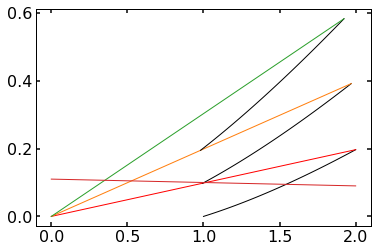

In [3]:
import LogSpiralCalc as lgs
x0, y0 = 0, 0.11
xdir, ydir = 1, -0.01
line = lgs.Line2D(x0, y0, xdir, ydir)
log = lgs.LogSpiral(xstart=1.0, xend=2, psi=8, theta_range=15)
inter = lgs.Intersection(log, line)
print('x y', inter.return_scatter_coords())
fig, ax = log.plot_log_spir()
x, y = zip(line.return_coords(0), line.return_coords(2))
ax.plot(x, y, marker=' ', linestyle='-')


# Test for branches

In [10]:
import LogSpiralCalc as lgs
%matplotlib qt
x0, y0 = 0, 0.11
xdir, ydir = 1, -0.01
line = lgs.Line2D(x0, y0, xdir, ydir)
log  = lgs.LogSpiral(xstart=1.0, xend=2, psi=9, theta_range=15)
fig, ax = log.plot_log_spir()
inters = lgs.Intersection(log, line)
#theta = inters.return_prelim_theta_int()
x, y = zip(line.return_coords(0), line.return_coords(2))
print('xend, yend', x, y, line.return_coords(2))
#print(inters.return_prelim_x())
#theta = inters.return_precise_thetaint()
#print('precise', inters.logspir.return_cart_coords(theta))
print(inters.return_all_branches())
ax.plot(x, y, marker=' ')
ax.set_aspect('equal')

xend, yend (0, 2) (0.11, 0.09) (2, 0.09)
no can do  1
[(1.4916587697975878, 1.4916587697975878, 0.09508341230308401)]


In [7]:
# test case 
xs = 1
xe = 2
psi = 1#deg
psi_rad = np.pi/180*psi
k = 1/np.tan(psi_rad)
prelim_theta_end = np.log(xe/xs)/k
function = lambda theta: np.cos(theta)*xs*np.exp(k*theta)-xe
derivative = lambda theta: xs*np.exp(k*theta)*(np.cos(theta)*k-np.sin(theta))


print(prelim_theta_end)

def newton(x0, func, deriv, prec=0.00000000001):
    for k in range(100):
        xn = x0 - func(x0)/deriv(x0)
        print('x0', x0, 'xn', xn)
        if abs(xn-x0) < prec:
            print('iterations {}'.format(k))
            return xn
        x0 = xn
    return None
theta_range = np.linspace(0,prelim_theta_end*2,100)
fig,ax = plt.subplots(1)
ax.plot(theta_range,function(theta_range),linestyle='-', marker=' ')
ax.plot([0,0.025],[newton(prelim_theta_end, function, derivative),newton(prelim_theta_end, function, derivative)])


0.012098929041484803
x0 0.012098929041484803 xn 0.012100206961151709
x0 0.012100206961151709 xn 0.012100206914398618
x0 0.012100206914398618 xn 0.012100206914398618
iterations 2
x0 0.012098929041484803 xn 0.012100206961151709
x0 0.012100206961151709 xn 0.012100206914398618
x0 0.012100206914398618 xn 0.012100206914398618
iterations 2


In [2]:
%config IPCompleter.use_jedi = False

In [4]:
import LogSpiralCalc as lgs
%matplotlib qt
l = lgs.LogSpiral(1, 2, 16,12)
l.return_equiv_vector(plot=False)
m = 0.15
xdir = 1
ydir = 0.15
y0 = -0.05
x0 = 0
line = lgs.Line2D(x0, y0, xdir, ydir)
inters = lgs.Intersection(l,line)
#l.return_equiv_line(plot=True)
theta_int = inters.return_precise_thetaint(max_iterations=100, precision=10**-9)
print(theta_int)
#print(0 < theta_int < inters.logspir.theta_end)
inters.return_scatter_coords()

try:
    fig,ax = inters.plot_intersection()
    ax.set_aspect('equal')
    ax.plot([0,1], [y0,y0+m])
except:
    pass

0.11587444732306833


In [15]:
import LogSpiralCalc as lgs
%matplotlib qt
theta = -45
y0 = 10
m = 0
line = lgs.Line2D(x0 ,y0, xdir, ydir)
rot_line = line
rot_line.rotate_line(theta)
m_rot, y0_rot = rot_line.return_turned_line(theta)
fig,ax = plt.subplots(1)
calcy_line = lambda x: line.y0 + line.m * x
calcy_rot  = lambda x: m_rot * x + y0_rot
xs = np.linspace(-10,10,100)
## point 
xr = -np.sin(theta*np.pi/180)*y0
yr = np.cos(theta*np.pi/180)*y0

ax.plot(xs, calcy_line(xs), marker = ' ', linestyle='-')
ax.plot(xs, calcy_rot(xs), marker = ' ', linestyle='-')
ax.set_aspect('equal')
ax.plot(xr,yr)


AttributeError: 'Line2D' object has no attribute 'return_turned_line'

In [1]:
import LogSpiralCalc as lgs
log = lgs.LogSpiral()

In [2]:
import LogSpiralCalc as lgs
line = lgs.Line2D(0, 0.01)
%matplotlib inline
line.rotate_line(3)
log = lgs.LogSpiral(1, 1.5, 15,10)
inters = lgs.Intersection(log, line)
fig, ax = log.plot_log_spir()
ax.plot([0, 2], [line.return_coords(0)[1], line.return_coords(2)[1]])
print('rotated?',line.m, line.y0)
print(inters.return_all_branches())
ax.plot([0, 2], [line.return_coords(0)[1], line.return_coords(2)[1]])
print('rotated?',line.m, line.y0)
print('prelimx', inters.return_prelim_x())

fig, ax = inters.plot_intersection()
ax.set_aspect('equal')

TypeError: __init__() missing 2 required positional arguments: 'xdir' and 'ydir'

In [4]:
%matplotlib auto
import LogSpiralCalc as lgs
log = lgs.LogSpiral(1, 4, 5, 30)
log.update_theta_end()
x0 = 0
y0 = 1
xdir = 1
ydir = -0.5
line = lgs.Line2D(x0, y0, xdir, ydir)

print(log.theta_end)

fig, ax = log.plot_log_spir()
ax.set_aspect('equal')

fig, ax = plt.subplots()
ax.plot([x0, x0 + 2], [y0, y0+ydir/xdir*2], color = 'green', label='incoming', marker=' ')
inter = lgs.Intersection(log, line)
print(inter.return_scatter_coords())
print(inter.return_precise_thetaint())
fig, ax = inter.plot_intersection(fig, ax)


x0 = 0
y0 = 0
xdir = 1
ydir = 0.02
line = lgs.Line2D(x0, y0, xdir, ydir)
inter = lgs.Intersection(log, line)
#fig, ax = inter.plot_intersection(fig, ax)
ax.set_aspect('equal')
ax.legend()
fig.savefig('reflection_sample.pdf', bbox_inches='tight')

Using matplotlib backend: Qt5Agg
0.1219370783745738
(1.8111629429078604, 0.09441852854608908)
0.05208428915065764


[[1, 3, 5], [2, 4, 6]]